# Analisando probabilidades

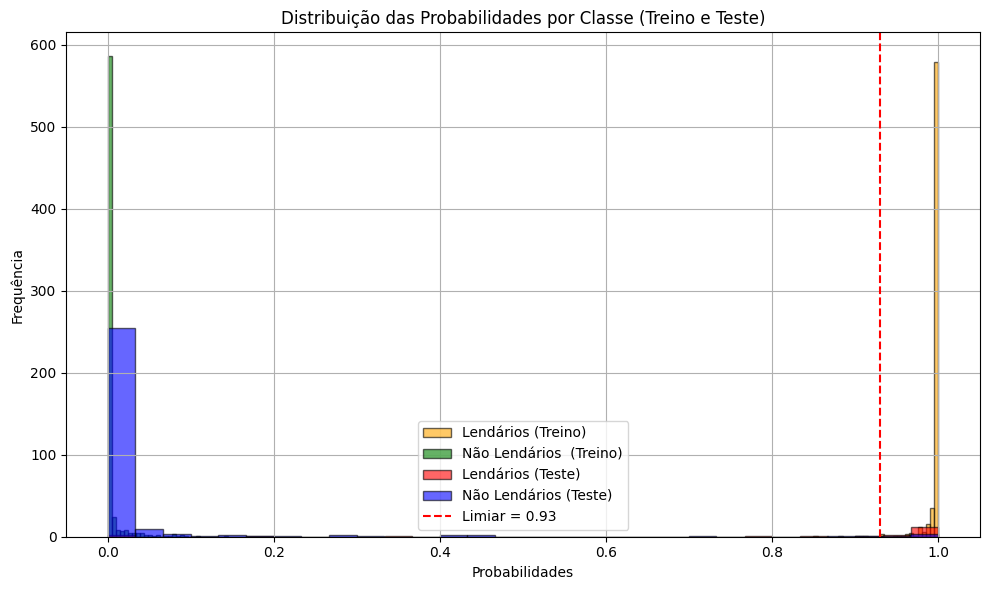

In [8]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt


model = joblib.load('best_model_xgb_rand.pkl')


train_df = pd.read_csv('poke_train_minmax_smote.csv')
test_df = pd.read_csv('poke_test_minmax.csv')


X_train = train_df.drop('is_legendary', axis=1)
y_train = train_df['is_legendary']

X_test = test_df.drop('is_legendary', axis=1)
y_test = test_df['is_legendary']


probs_train = model.predict_proba(X_train)[:, 1]
probs_test = model.predict_proba(X_test)[:, 1]


plt.figure(figsize=(10, 6))


prob_legend_train = probs_train[y_train == True]
prob_not_legend_train = probs_train[y_train == False]


prob_legend_test = probs_test[y_test == True]
prob_not_legend_test = probs_test[y_test == False]


threshold = 0.93

plt.hist(prob_legend_train, bins=30, color='orange', alpha=0.6, label='Lendários (Treino)', edgecolor='black')
plt.hist(prob_not_legend_train, bins=30, color='green', alpha=0.6, label='Não Lendários  (Treino)', edgecolor='black')

plt.hist(prob_legend_test, bins=30, color='red', alpha=0.6, label='Lendários (Teste)', edgecolor='black')
plt.hist(prob_not_legend_test, bins=30, color='blue', alpha=0.6, label='Não Lendários (Teste)', edgecolor='black')


plt.axvline(x=threshold, color='red', linestyle='--', label=f'Limiar = {threshold}')


plt.xlabel('Probabilidades')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades por Classe (Treino e Teste)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()


plt.show()


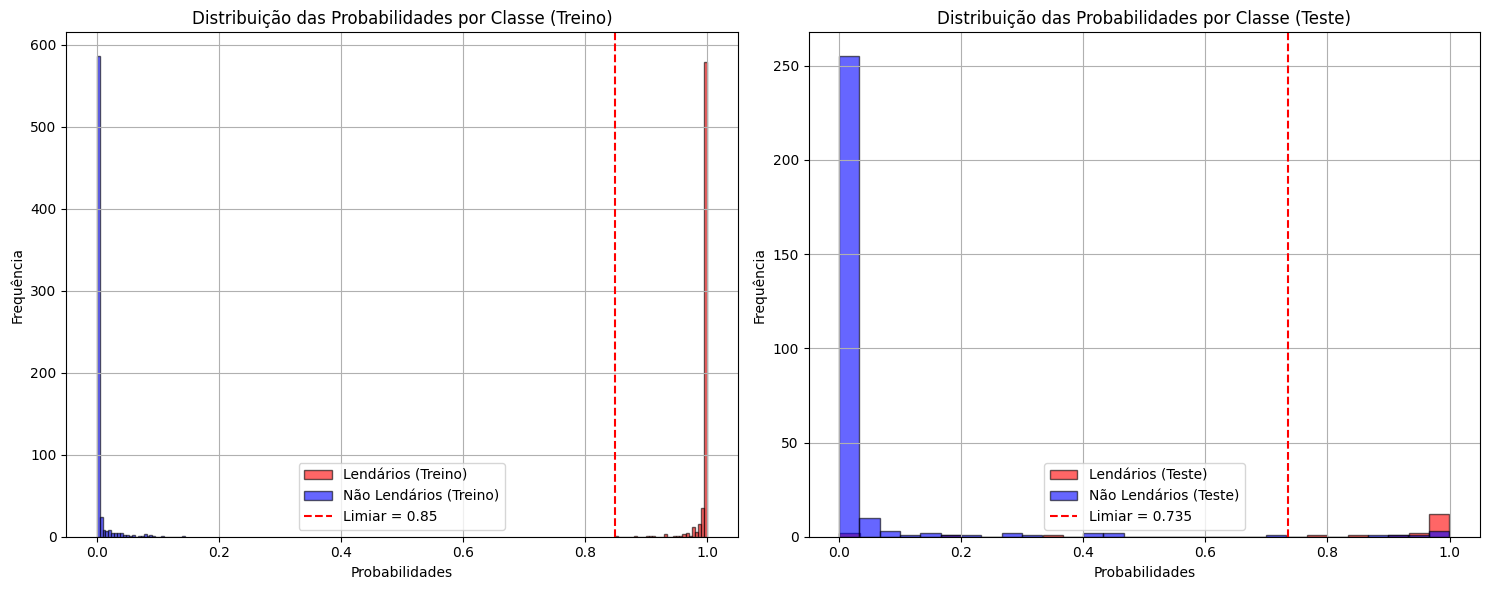

In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt


model = joblib.load('best_model_xgb_rand.pkl')

train_df = pd.read_csv('poke_train_minmax_smote.csv')
test_df = pd.read_csv('poke_test_minmax.csv')


X_train = train_df.drop('is_legendary', axis=1)
y_train = train_df['is_legendary']

X_test = test_df.drop('is_legendary', axis=1)
y_test = test_df['is_legendary']


probs_train = model.predict_proba(X_train)[:, 1]
probs_test = model.predict_proba(X_test)[:, 1]


threshold_train = 0.85
threshold_test = 0.735


plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)

prob_legend_train = probs_train[y_train == True]
prob_not_legend_train = probs_train[y_train == False]

plt.hist(prob_legend_train, bins=30, color='red', alpha=0.6, label='Lendários (Treino)', edgecolor='black')
plt.hist(prob_not_legend_train, bins=30, color='blue', alpha=0.6, label='Não Lendários (Treino)', edgecolor='black')
plt.axvline(x=threshold_train, color='red', linestyle='--', label=f'Limiar = {threshold_train}')
plt.xlabel('Probabilidades')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades por Classe (Treino)')
plt.legend(loc='best')
plt.grid(True)


plt.subplot(1, 2, 2)
prob_legend_test = probs_test[y_test == True]
prob_not_legend_test = probs_test[y_test == False]

plt.hist(prob_legend_test, bins=30, color='red', alpha=0.6, label='Lendários (Teste)', edgecolor='black')
plt.hist(prob_not_legend_test, bins=30, color='blue', alpha=0.6, label='Não Lendários (Teste)', edgecolor='black')
plt.axvline(x=threshold_test, color='red', linestyle='--', label=f'Limiar = {threshold_test}')
plt.xlabel('Probabilidades')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades por Classe (Teste)')
plt.legend(loc='best')
plt.grid(True)


plt.tight_layout()

plt.show()
